Name: **Jorge García Gámiz**

Subject: Machine Learning

Date: 15/01/2025

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Company.csv to Company.csv


In [51]:
data = pd.read_csv('/content/Company.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Promotion
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Label encoding involves converting categorical data into numerical format by assigning a distinct integer label to each category or class.

In [52]:
label_columns = data.select_dtypes(include=['object']).columns

In [53]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

for col in label_columns:
    le = preprocessing.LabelEncoder()
    data[col] = le.fit_transform(data[col])
    l = list(le.classes_)

data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Promotion
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [54]:
data.Promotion.value_counts(normalize=True)

,proportion
Promotion,
1,0.645
0,0.355


<Axes: xlabel='Promotion', ylabel='count'>

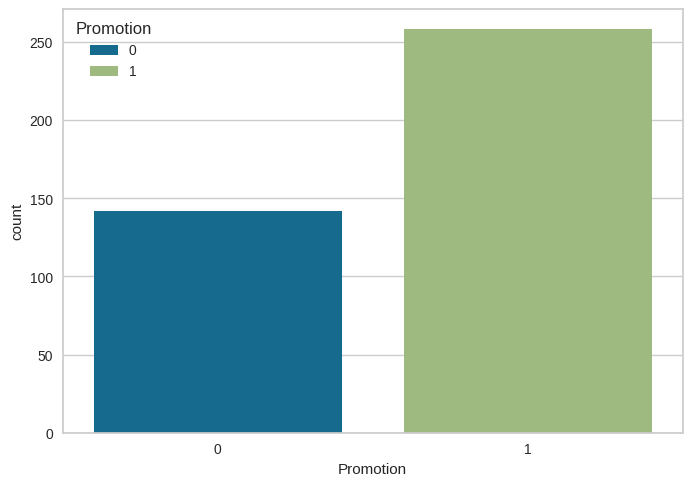

In [55]:
sns.countplot(x='Promotion', data=data, hue='Promotion')

# Train/Test

In [64]:
X = data.drop('Promotion', axis=1)
y = data['Promotion']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [69]:
# to check the proportion is still ok
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Promotion
1    0.645
0    0.355
Name: proportion, dtype: float64
Promotion
1    0.643333
0    0.356667
Name: proportion, dtype: float64
Promotion
1    0.65
0    0.35
Name: proportion, dtype: float64


# First model

In [70]:
from sklearn.tree import DecisionTreeClassifier
model01 = DecisionTreeClassifier() # default constructor
model01.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
pred01 = model01.predict(X_test)

## Evaluation

In [72]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, pred01))

Accuracy Score:  0.85


#### Confusion Matrix:

$$
\begin{array}{cc}
 & predicted\\
observed & \begin{array}{ccc}
 & 0 & 1\\
0 & TN & FP\\
1 & FN & TP
\end{array}
\end{array}
$$

In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred01))

[[26  9]
 [ 6 59]]


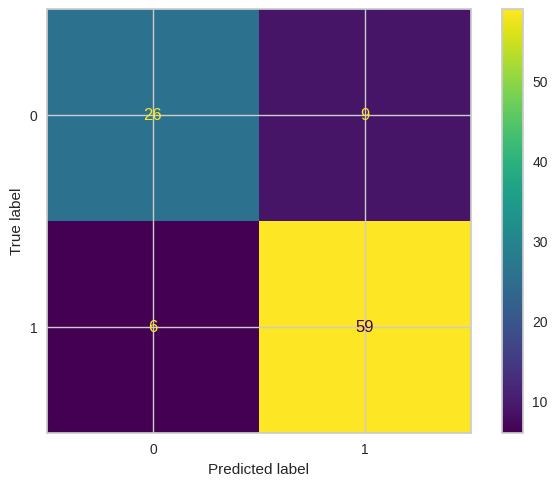

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred01, labels=model01.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model01.classes_)
disp.plot()
plt.show()

#### Classification Report

 * **Precision**: The proportion of true positive predictions out of all predictions made for a given class. It answers: "When the model predicts a class, how often is it correct?"
$$
\text{Precision}=\frac{\text{True Positives (TP)}}{\text{True Positives (TP)}+\text{False Positives (FP)}}
$$


 * **Recall** (Sensitivity or True Positive Rate): The proportion of actual positives correctly identified. It answers: "Out of all actual instances of a class, how many were predicted correctly?"
$$
\text{Recall}=\frac{\text{True Positives (TP)}}{\text{True Positives (TP)}+\text{False Negatives (FN)}}
$$

 * **F1-Score**: The harmonic mean of precision and recall. It balances the trade-off between precision and recall.
$$
\text{F1-Score}=2\cdot \frac{\text{Precision}\cdot\text{Recall}}{\text{Precision}+\text{Recall}}
$$

 * **Support**: The number of true instances of each class in the test data.

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred01, target_names=['No(0)','Yes(1)']))

              precision    recall  f1-score   support

       No(0)       0.81      0.74      0.78        35
      Yes(1)       0.87      0.91      0.89        65

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.85      0.85      0.85       100



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


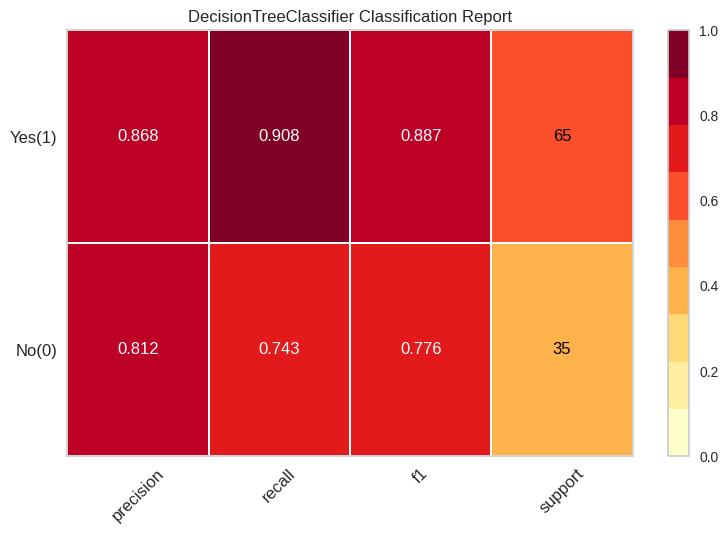

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [76]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(model01, classes=['No(0)','Yes(1)'], support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Cohen-Kappa score

In [78]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, pred01)

0.6636771300448431

#### ROC and AUC

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


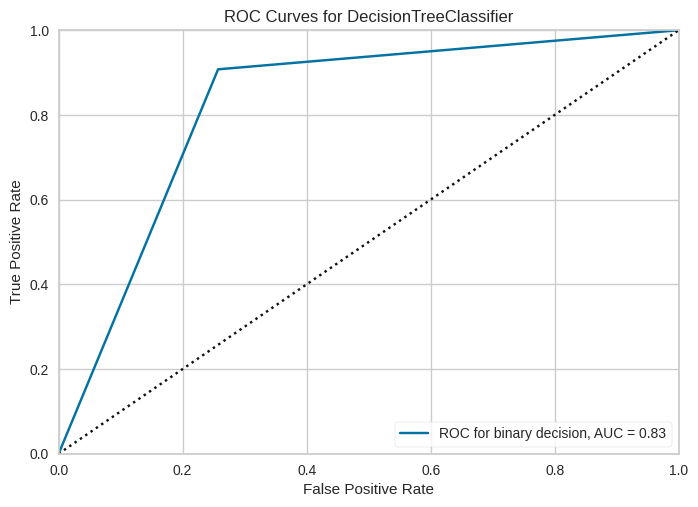

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [77]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(model01, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

An AUC of 0.83  means that 83%  of the time, the model assigns a higher score to a positive instance than to a negative one.

# Second model

In [80]:
model02 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)
model02.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

In [81]:
pred02 = model02.predict(X_test)

## Visualization

In [82]:
from sklearn import tree
features = X.columns

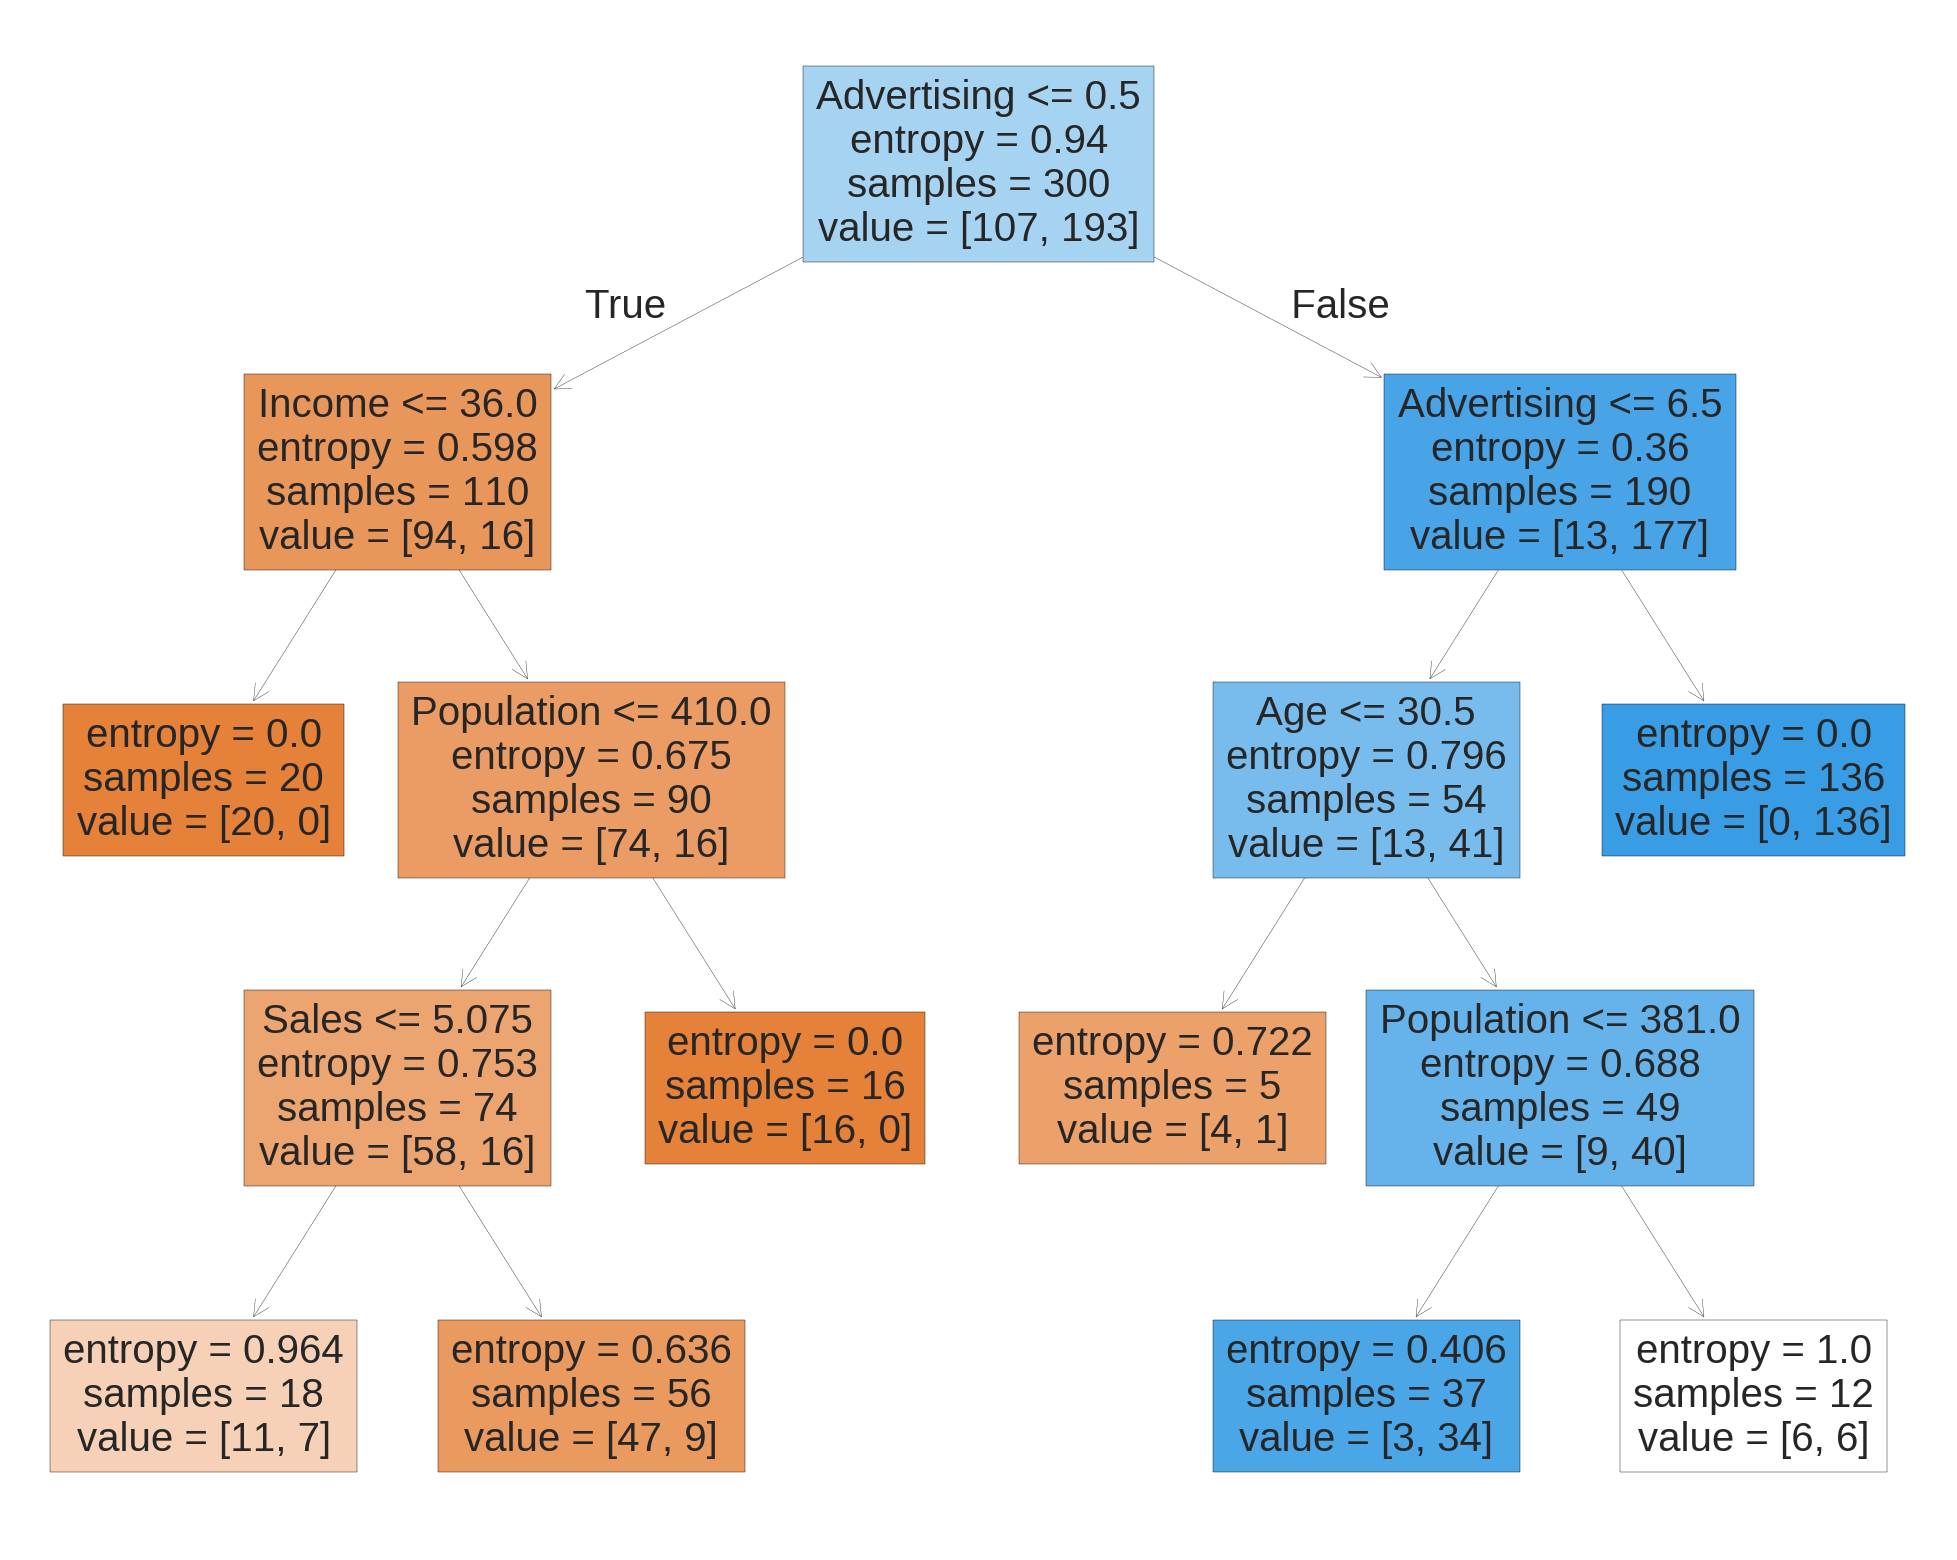

In [83]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model02,
                   feature_names=features,
                   filled=True)

## Evaluation

In [84]:
print('Accuracy Score: ', accuracy_score(y_test, pred02))

Accuracy Score:  0.91


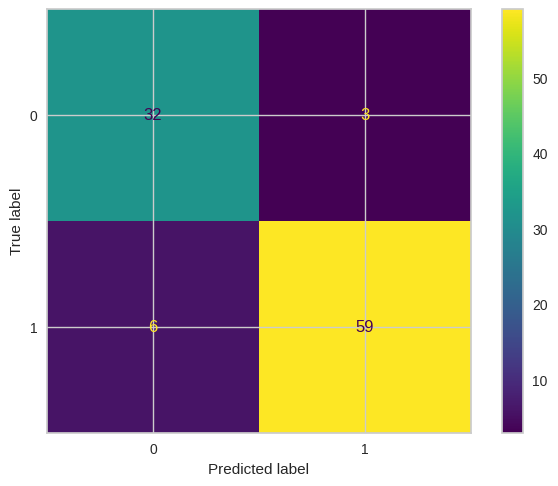

In [85]:
cm = confusion_matrix(y_test, pred02, labels=model02.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model02.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


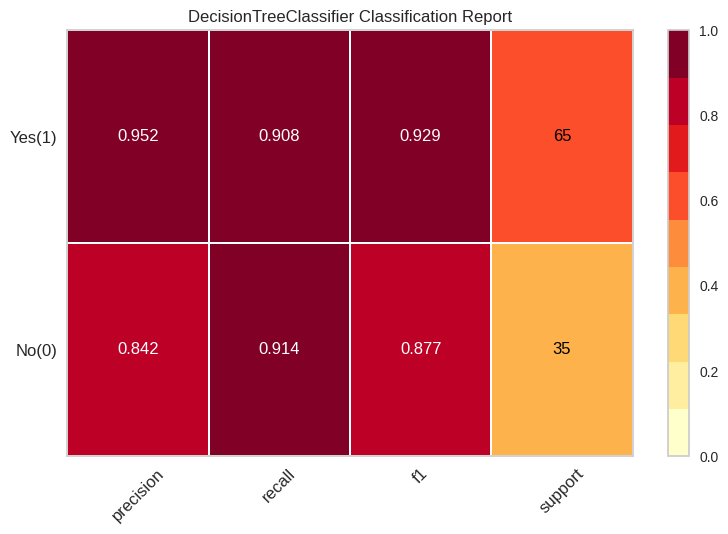

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [86]:
visualizer = ClassificationReport(model02, classes=['No(0)','Yes(1)'], support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

Of all actual "No(0)" instances, the model correctly identifies 91.40% (`recall` value for Class `No(0)`), This is the proportion of negative instances that are correctly classified in this model

In [87]:
cohen_kappa_score(y_test, pred02)

0.8060344827586207

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


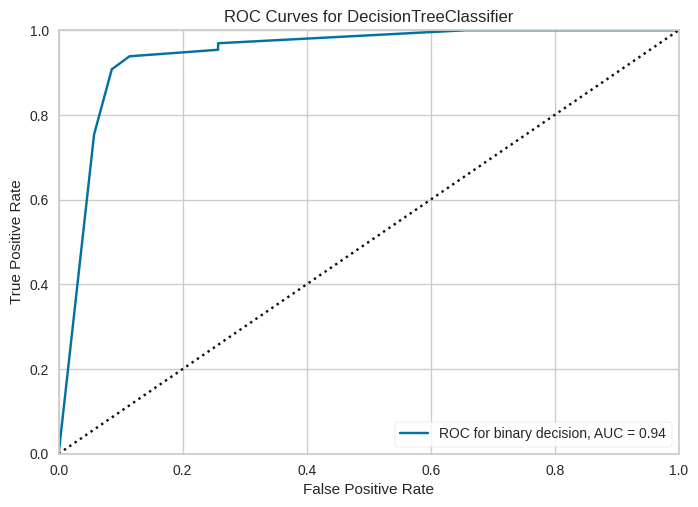

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [88]:
vis = ROCAUC(model02, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

An AUC of  0.94  means that  94%  of the time, the model assigns a higher score to a positive instance than to a negative one.

## Trade-off between bias and variance

In [89]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=model02,  # the estimator is our model (model02)
                               X=X_train,       # the feature matrix for training
                               y=y_train,       # the target vector for training
                               train_sizes=np.linspace(0.1, 1.0, 10), # varying training sizes
                               cv=10,           # cross validation
                               n_jobs=-1)       # use all CPU cores for parallel computation

In [90]:
train_mean = np.mean(train_scores, axis=1)  # Mean training accuracy for each training size
train_std = np.std(train_scores, axis=1)    # Standard deviation of training accuracy
test_mean = np.mean(test_scores, axis=1)    # Mean validation accuracy for each training size
test_std = np.std(test_scores, axis=1)      # Standard deviation of validation accuracy

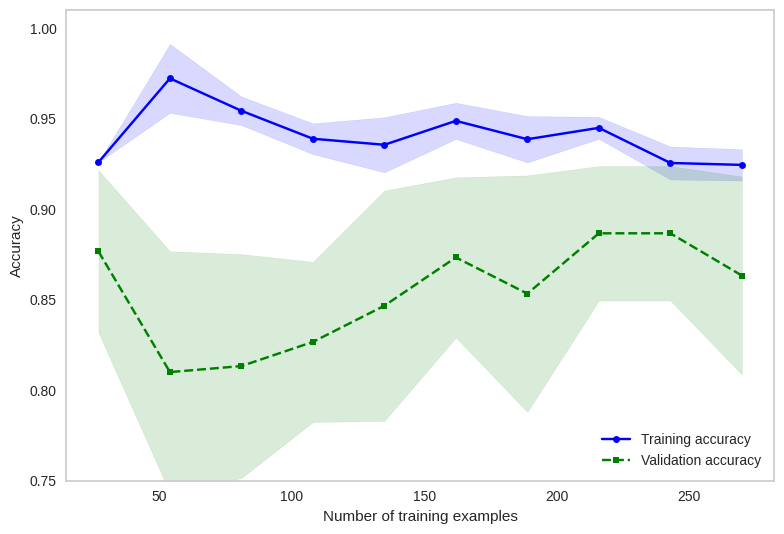

In [92]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.75, 1.01])
plt.tight_layout()
plt.show()

When we see this plot, we can say that this is an over-fitted model because of the big gap between those two lines, which means this is indeed an over-fitted model.

# Third model

In [94]:
params = {
    'criterion' :['entropy','gini'],  # functions measuring the quality of the split
    'max_depth':[2,3,5,7],  # maximum tree height
    'min_samples_leaf':[4,10,25,50]  # minimum number of samples in a leaf
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model02,
                           param_grid=params,
                           cv = 5   # 5-fold cross-validation
              )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              min_samples_leaf=4),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 7],
                         'min_samples_leaf': [4, 10, 25, 50]})

Let's see the best parameters for this second model

In [96]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4}

In [97]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=4)

In [98]:
pred03 = best_model.predict(X_test)

## Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


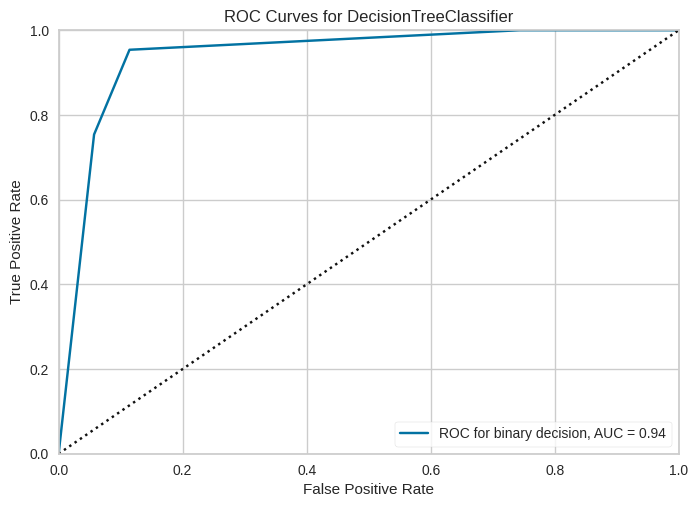

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [100]:
vis = ROCAUC(best_model, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

An AUC of 0.94 means that 94% of the time, the model assigns a higher score to a positive instance than to a negative one.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


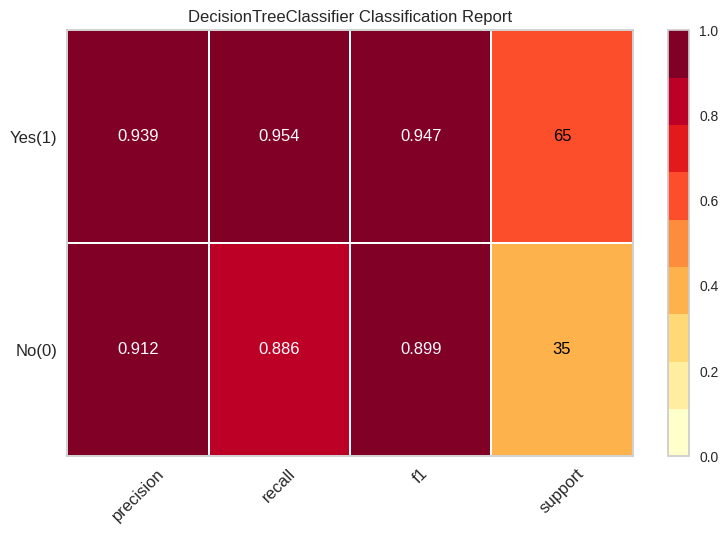

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [101]:
visualizer = ClassificationReport(best_model, classes=['No(0)','Yes(1)'], support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

Of all actual "No(0)" instances, the model correctly identifies 88.60% (`recall` value for Class `No(0)`), This is the proportion of negative instances that are correctly classified in this model